In [36]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import PredictionErrorDisplay
import statsmodels.api as sm
import lightgbm as lgb

In [37]:
# Display Options of DataFrame
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [38]:
# Loading Swap Rate Dataset
data = pd.read_csv("../cleanedDataIR/irwithevol.csv")

In [39]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Value Date', 'Trade Name',
       'Trade Currency', 'Zero Rate Shock', 'Zero Rate Shock (DEC)', 'TV',
       'Expiry Bucket', 'Expiry Date', 'Tenor Bucket', 'Vega', 'CMS Tenor',
       'Swap Rate', 'Swap Rate (Shocked)', 'lower_bound', 'upper_bound',
       'bound width', 'month_pay_frequency', 'year_maturity',
       'Distance_lower (Shocked)', 'Distance_upper (Shocked)', 'Out of Bound',
       'Swap_Bound Distance', 'Vols', 'Swap Rate_f', 'Swap Rate_f(shocked)',
       'pre', 'prer', 'prev', 'evol'],
      dtype='object')

In [40]:
data = data.drop(columns = ['Swap Rate_f', 'Swap Rate_f(shocked)','pre', 'prer', 'prev'])


In [41]:
data = data.drop(columns = {'Unnamed: 0.1', 'Unnamed: 0'})
data

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol
0,2022-09-02,dummyTrade1,USD,-100,-0.01000,-227907.09877,1.00000,2023-09-04,10.00000,1.96225,2,0.02916,0.01916,0.00420,0.03790,0.03370,6,5,0.01496,0.01874,False,0.01496,0.17753,4.59146
1,2022-09-02,dummyTrade1,USD,-50,-0.00500,-222208.40097,1.00000,2023-09-04,10.00000,-3.81234,2,0.02916,0.02416,0.00420,0.03790,0.03370,6,5,0.01996,0.01374,False,0.01374,0.17753,2.42209
2,2022-09-02,dummyTrade1,USD,-25,-0.00250,-218960.92800,1.00000,2023-09-04,10.00000,4.47101,2,0.02916,0.02666,0.00420,0.03790,0.03370,6,5,0.02246,0.01124,False,0.01124,0.17753,1.43348
3,2022-09-02,dummyTrade1,USD,-10,-0.00100,-216872.43011,1.00000,2023-09-04,10.00000,4.33340,2,0.02916,0.02816,0.00420,0.03790,0.03370,6,5,0.02396,0.00974,False,0.00974,0.17753,0.82121
4,2022-09-02,dummyTrade1,USD,-5,-0.00050,-216146.31033,1.00000,2023-09-04,10.00000,5.67969,2,0.02916,0.02866,0.00420,0.03790,0.03370,6,5,0.02446,0.00924,False,0.00924,0.17753,0.60587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919099,2024-01-12,dummyTrade9,USD,10,0.00100,-547852.05593,15.00000,2039-01-12,8.00000,5.00795,5,0.03039,0.03139,0.00440,0.03970,0.03530,6,10,0.02699,0.00831,False,0.00831,0.25391,0.74156
3919100,2024-01-12,dummyTrade9,USD,25,0.00250,-521228.58762,15.00000,2039-01-12,8.00000,5.13151,5,0.03039,0.03289,0.00440,0.03970,0.03530,6,10,0.02849,0.00681,False,0.00681,0.25391,0.99736
3919101,2024-01-12,dummyTrade9,USD,50,0.00500,-464905.98210,15.00000,2039-01-12,8.00000,3.34862,5,0.03039,0.03539,0.00440,0.03970,0.03530,6,10,0.03099,0.00431,False,0.00431,0.25391,1.39943
3919102,2024-01-12,dummyTrade9,USD,75,0.00750,-391315.04193,15.00000,2039-01-12,8.00000,1.06363,5,0.03039,0.03789,0.00440,0.03970,0.03530,6,10,0.03349,0.00181,False,0.00181,0.25391,1.74443


In [42]:
# Find lag 1 by shifting the amount of data in one date
delay = len(data.loc[data['Value Date'] == "2022-09-02"])

# Realized Swap Rate Prev
data['Swap Rate Lag 1 (Real)'] = data['Swap Rate'].shift(delay)

In [43]:
data

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol,Swap Rate Lag 1 (Real)
0,2022-09-02,dummyTrade1,USD,-100,-0.01000,-227907.09877,1.00000,2023-09-04,10.00000,1.96225,2,0.02916,0.01916,0.00420,0.03790,0.03370,6,5,0.01496,0.01874,False,0.01496,0.17753,4.59146,NaN
1,2022-09-02,dummyTrade1,USD,-50,-0.00500,-222208.40097,1.00000,2023-09-04,10.00000,-3.81234,2,0.02916,0.02416,0.00420,0.03790,0.03370,6,5,0.01996,0.01374,False,0.01374,0.17753,2.42209,NaN
2,2022-09-02,dummyTrade1,USD,-25,-0.00250,-218960.92800,1.00000,2023-09-04,10.00000,4.47101,2,0.02916,0.02666,0.00420,0.03790,0.03370,6,5,0.02246,0.01124,False,0.01124,0.17753,1.43348,NaN
3,2022-09-02,dummyTrade1,USD,-10,-0.00100,-216872.43011,1.00000,2023-09-04,10.00000,4.33340,2,0.02916,0.02816,0.00420,0.03790,0.03370,6,5,0.02396,0.00974,False,0.00974,0.17753,0.82121,NaN
4,2022-09-02,dummyTrade1,USD,-5,-0.00050,-216146.31033,1.00000,2023-09-04,10.00000,5.67969,2,0.02916,0.02866,0.00420,0.03790,0.03370,6,5,0.02446,0.00924,False,0.00924,0.17753,0.60587,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919099,2024-01-12,dummyTrade9,USD,10,0.00100,-547852.05593,15.00000,2039-01-12,8.00000,5.00795,5,0.03039,0.03139,0.00440,0.03970,0.03530,6,10,0.02699,0.00831,False,0.00831,0.25391,0.74156,0.03069
3919100,2024-01-12,dummyTrade9,USD,25,0.00250,-521228.58762,15.00000,2039-01-12,8.00000,5.13151,5,0.03039,0.03289,0.00440,0.03970,0.03530,6,10,0.02849,0.00681,False,0.00681,0.25391,0.99736,0.03069
3919101,2024-01-12,dummyTrade9,USD,50,0.00500,-464905.98210,15.00000,2039-01-12,8.00000,3.34862,5,0.03039,0.03539,0.00440,0.03970,0.03530,6,10,0.03099,0.00431,False,0.00431,0.25391,1.39943,0.03069
3919102,2024-01-12,dummyTrade9,USD,75,0.00750,-391315.04193,15.00000,2039-01-12,8.00000,1.06363,5,0.03039,0.03789,0.00440,0.03970,0.03530,6,10,0.03349,0.00181,False,0.00181,0.25391,1.74443,0.03069


In [44]:
zero_subset = data['Zero Rate Shock'] == 0
shock_subset = -zero_subset
zero = data[zero_subset].reset_index(drop = True)
shock = data[shock_subset].reset_index(drop = True)

In [45]:
zero

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol,Swap Rate Lag 1 (Real)
0,2022-09-02,dummyTrade1,USD,0,0.00000,-215402.65615,1.00000,2023-09-04,10.00000,5.01627,2,0.02916,0.02916,0.00420,0.03790,0.03370,6,5,0.02496,0.00874,False,0.00874,0.17753,0.42622,NaN
1,2022-09-02,dummyTrade10,USD,0,0.00000,-616299.36924,1.00000,2023-09-04,10.00000,-59.82041,5,0.02725,0.02725,0.00440,0.03970,0.03530,4,10,0.02285,0.01245,False,0.01245,0.17753,0.42622,NaN
2,2022-09-02,dummyTrade11,USD,0,0.00000,-608678.01098,1.00000,2023-09-04,10.00000,7.76260,10,0.02738,0.02738,0.00460,0.04170,0.03710,4,10,0.02278,0.01432,False,0.01432,0.17753,0.42622,NaN
3,2022-09-02,dummyTrade12,USD,0,0.00000,-609360.66241,1.00000,2023-09-04,10.00000,25.32978,10,0.02738,0.02738,0.00460,0.04170,0.03710,3,10,0.02278,0.01432,False,0.01432,0.17753,0.42622,NaN
4,2022-09-02,dummyTrade2,USD,0,0.00000,-215836.78721,1.00000,2023-09-04,10.00000,5.40938,2,0.02916,0.02916,0.00420,0.03790,0.03370,4,5,0.02496,0.00874,False,0.00874,0.17753,0.42622,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326587,2024-01-12,dummyTrade5,USD,0,0.00000,-200752.70782,15.00000,2039-01-12,8.00000,-0.27797,10,0.03171,0.03171,0.00460,0.04170,0.03710,4,5,0.02711,0.00999,False,0.00999,0.25391,0.67547,0.03188
326588,2024-01-12,dummyTrade6,USD,0,0.00000,-200966.21477,15.00000,2039-01-12,8.00000,-0.29635,10,0.03171,0.03171,0.00460,0.04170,0.03710,3,5,0.02711,0.00999,False,0.00999,0.25391,0.67547,0.03188
326589,2024-01-12,dummyTrade7,USD,0,0.00000,-507396.66328,15.00000,2039-01-12,8.00000,5.05610,2,0.02983,0.02983,0.00420,0.03790,0.03370,6,10,0.02563,0.00807,False,0.00807,0.25391,0.67547,0.03052
326590,2024-01-12,dummyTrade8,USD,0,0.00000,-508418.03933,15.00000,2039-01-12,8.00000,4.91148,2,0.02983,0.02983,0.00420,0.03790,0.03370,4,10,0.02563,0.00807,False,0.00807,0.25391,0.67547,0.03052


In [46]:
delay = len(zero.loc[zero['Value Date'] == "2022-09-02"])
zero['Vols Prev'] = zero['Vols'].shift(delay)
zero['Vols Change'] = zero['Vols'] - zero['Vols Prev']
zero

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol,Swap Rate Lag 1 (Real),Vols Prev,Vols Change
0,2022-09-02,dummyTrade1,USD,0,0.00000,-215402.65615,1.00000,2023-09-04,10.00000,5.01627,2,0.02916,0.02916,0.00420,0.03790,0.03370,6,5,0.02496,0.00874,False,0.00874,0.17753,0.42622,NaN,NaN,NaN
1,2022-09-02,dummyTrade10,USD,0,0.00000,-616299.36924,1.00000,2023-09-04,10.00000,-59.82041,5,0.02725,0.02725,0.00440,0.03970,0.03530,4,10,0.02285,0.01245,False,0.01245,0.17753,0.42622,NaN,NaN,NaN
2,2022-09-02,dummyTrade11,USD,0,0.00000,-608678.01098,1.00000,2023-09-04,10.00000,7.76260,10,0.02738,0.02738,0.00460,0.04170,0.03710,4,10,0.02278,0.01432,False,0.01432,0.17753,0.42622,NaN,NaN,NaN
3,2022-09-02,dummyTrade12,USD,0,0.00000,-609360.66241,1.00000,2023-09-04,10.00000,25.32978,10,0.02738,0.02738,0.00460,0.04170,0.03710,3,10,0.02278,0.01432,False,0.01432,0.17753,0.42622,NaN,NaN,NaN
4,2022-09-02,dummyTrade2,USD,0,0.00000,-215836.78721,1.00000,2023-09-04,10.00000,5.40938,2,0.02916,0.02916,0.00420,0.03790,0.03370,4,5,0.02496,0.00874,False,0.00874,0.17753,0.42622,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326587,2024-01-12,dummyTrade5,USD,0,0.00000,-200752.70782,15.00000,2039-01-12,8.00000,-0.27797,10,0.03171,0.03171,0.00460,0.04170,0.03710,4,5,0.02711,0.00999,False,0.00999,0.25391,0.67547,0.03188,0.25127,0.00264
326588,2024-01-12,dummyTrade6,USD,0,0.00000,-200966.21477,15.00000,2039-01-12,8.00000,-0.29635,10,0.03171,0.03171,0.00460,0.04170,0.03710,3,5,0.02711,0.00999,False,0.00999,0.25391,0.67547,0.03188,0.25127,0.00264
326589,2024-01-12,dummyTrade7,USD,0,0.00000,-507396.66328,15.00000,2039-01-12,8.00000,5.05610,2,0.02983,0.02983,0.00420,0.03790,0.03370,6,10,0.02563,0.00807,False,0.00807,0.25391,0.67547,0.03052,0.25127,0.00264
326590,2024-01-12,dummyTrade8,USD,0,0.00000,-508418.03933,15.00000,2039-01-12,8.00000,4.91148,2,0.02983,0.02983,0.00420,0.03790,0.03370,4,10,0.02563,0.00807,False,0.00807,0.25391,0.67547,0.03052,0.25127,0.00264


In [47]:
# Find Risk of RAN notes contributed by swaption IV changes

# change in TV caused by vega (t=0) = previous vega (t-1)* vol change
zero['Vega Lag 1']  = zero['Vega'].shift(delay)
zero['Vega Risk Exposure'] = zero['Vols Change'] * zero['Vega Lag 1']
zero

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol,Swap Rate Lag 1 (Real),Vols Prev,Vols Change,Vega Lag 1,Vega Risk Exposure
0,2022-09-02,dummyTrade1,USD,0,0.00000,-215402.65615,1.00000,2023-09-04,10.00000,5.01627,2,0.02916,0.02916,0.00420,0.03790,0.03370,6,5,0.02496,0.00874,False,0.00874,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN
1,2022-09-02,dummyTrade10,USD,0,0.00000,-616299.36924,1.00000,2023-09-04,10.00000,-59.82041,5,0.02725,0.02725,0.00440,0.03970,0.03530,4,10,0.02285,0.01245,False,0.01245,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN
2,2022-09-02,dummyTrade11,USD,0,0.00000,-608678.01098,1.00000,2023-09-04,10.00000,7.76260,10,0.02738,0.02738,0.00460,0.04170,0.03710,4,10,0.02278,0.01432,False,0.01432,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN
3,2022-09-02,dummyTrade12,USD,0,0.00000,-609360.66241,1.00000,2023-09-04,10.00000,25.32978,10,0.02738,0.02738,0.00460,0.04170,0.03710,3,10,0.02278,0.01432,False,0.01432,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN
4,2022-09-02,dummyTrade2,USD,0,0.00000,-215836.78721,1.00000,2023-09-04,10.00000,5.40938,2,0.02916,0.02916,0.00420,0.03790,0.03370,4,5,0.02496,0.00874,False,0.00874,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326587,2024-01-12,dummyTrade5,USD,0,0.00000,-200752.70782,15.00000,2039-01-12,8.00000,-0.27797,10,0.03171,0.03171,0.00460,0.04170,0.03710,4,5,0.02711,0.00999,False,0.00999,0.25391,0.67547,0.03188,0.25127,0.00264,-0.15633,-0.00041
326588,2024-01-12,dummyTrade6,USD,0,0.00000,-200966.21477,15.00000,2039-01-12,8.00000,-0.29635,10,0.03171,0.03171,0.00460,0.04170,0.03710,3,5,0.02711,0.00999,False,0.00999,0.25391,0.67547,0.03188,0.25127,0.00264,-0.20701,-0.00055
326589,2024-01-12,dummyTrade7,USD,0,0.00000,-507396.66328,15.00000,2039-01-12,8.00000,5.05610,2,0.02983,0.02983,0.00420,0.03790,0.03370,6,10,0.02563,0.00807,False,0.00807,0.25391,0.67547,0.03052,0.25127,0.00264,5.04961,0.01331
326590,2024-01-12,dummyTrade8,USD,0,0.00000,-508418.03933,15.00000,2039-01-12,8.00000,4.91148,2,0.02983,0.02983,0.00420,0.03790,0.03370,4,10,0.02563,0.00807,False,0.00807,0.25391,0.67547,0.03052,0.25127,0.00264,4.26339,0.01124


In [48]:
zero['Vega Risk Exposure'].describe()

count   325620.00000
mean         0.02697
std         22.07968
min      -3300.85208
25%         -0.00761
50%          0.00000
75%          0.00829
max       5232.58544
Name: Vega Risk Exposure, dtype: float64

In [49]:
zero['Swap Rate Change'] = zero['Swap Rate'] - zero['Swap Rate Lag 1 (Real)']
zero

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol,Swap Rate Lag 1 (Real),Vols Prev,Vols Change,Vega Lag 1,Vega Risk Exposure,Swap Rate Change
0,2022-09-02,dummyTrade1,USD,0,0.00000,-215402.65615,1.00000,2023-09-04,10.00000,5.01627,2,0.02916,0.02916,0.00420,0.03790,0.03370,6,5,0.02496,0.00874,False,0.00874,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-02,dummyTrade10,USD,0,0.00000,-616299.36924,1.00000,2023-09-04,10.00000,-59.82041,5,0.02725,0.02725,0.00440,0.03970,0.03530,4,10,0.02285,0.01245,False,0.01245,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-09-02,dummyTrade11,USD,0,0.00000,-608678.01098,1.00000,2023-09-04,10.00000,7.76260,10,0.02738,0.02738,0.00460,0.04170,0.03710,4,10,0.02278,0.01432,False,0.01432,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-09-02,dummyTrade12,USD,0,0.00000,-609360.66241,1.00000,2023-09-04,10.00000,25.32978,10,0.02738,0.02738,0.00460,0.04170,0.03710,3,10,0.02278,0.01432,False,0.01432,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-02,dummyTrade2,USD,0,0.00000,-215836.78721,1.00000,2023-09-04,10.00000,5.40938,2,0.02916,0.02916,0.00420,0.03790,0.03370,4,5,0.02496,0.00874,False,0.00874,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326587,2024-01-12,dummyTrade5,USD,0,0.00000,-200752.70782,15.00000,2039-01-12,8.00000,-0.27797,10,0.03171,0.03171,0.00460,0.04170,0.03710,4,5,0.02711,0.00999,False,0.00999,0.25391,0.67547,0.03188,0.25127,0.00264,-0.15633,-0.00041,-0.00016
326588,2024-01-12,dummyTrade6,USD,0,0.00000,-200966.21477,15.00000,2039-01-12,8.00000,-0.29635,10,0.03171,0.03171,0.00460,0.04170,0.03710,3,5,0.02711,0.00999,False,0.00999,0.25391,0.67547,0.03188,0.25127,0.00264,-0.20701,-0.00055,-0.00016
326589,2024-01-12,dummyTrade7,USD,0,0.00000,-507396.66328,15.00000,2039-01-12,8.00000,5.05610,2,0.02983,0.02983,0.00420,0.03790,0.03370,6,10,0.02563,0.00807,False,0.00807,0.25391,0.67547,0.03052,0.25127,0.00264,5.04961,0.01331,-0.00069
326590,2024-01-12,dummyTrade8,USD,0,0.00000,-508418.03933,15.00000,2039-01-12,8.00000,4.91148,2,0.02983,0.02983,0.00420,0.03790,0.03370,4,10,0.02563,0.00807,False,0.00807,0.25391,0.67547,0.03052,0.25127,0.00264,4.26339,0.01124,-0.00069


In [50]:
zero['TV Lag 1'] = zero['TV'].shift(delay)
zero['TV Change'] = zero['TV'] - zero['TV Lag 1'] 
zero

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol,Swap Rate Lag 1 (Real),Vols Prev,Vols Change,Vega Lag 1,Vega Risk Exposure,Swap Rate Change,TV Lag 1,TV Change
0,2022-09-02,dummyTrade1,USD,0,0.00000,-215402.65615,1.00000,2023-09-04,10.00000,5.01627,2,0.02916,0.02916,0.00420,0.03790,0.03370,6,5,0.02496,0.00874,False,0.00874,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-02,dummyTrade10,USD,0,0.00000,-616299.36924,1.00000,2023-09-04,10.00000,-59.82041,5,0.02725,0.02725,0.00440,0.03970,0.03530,4,10,0.02285,0.01245,False,0.01245,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-09-02,dummyTrade11,USD,0,0.00000,-608678.01098,1.00000,2023-09-04,10.00000,7.76260,10,0.02738,0.02738,0.00460,0.04170,0.03710,4,10,0.02278,0.01432,False,0.01432,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-09-02,dummyTrade12,USD,0,0.00000,-609360.66241,1.00000,2023-09-04,10.00000,25.32978,10,0.02738,0.02738,0.00460,0.04170,0.03710,3,10,0.02278,0.01432,False,0.01432,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-02,dummyTrade2,USD,0,0.00000,-215836.78721,1.00000,2023-09-04,10.00000,5.40938,2,0.02916,0.02916,0.00420,0.03790,0.03370,4,5,0.02496,0.00874,False,0.00874,0.17753,0.42622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326587,2024-01-12,dummyTrade5,USD,0,0.00000,-200752.70782,15.00000,2039-01-12,8.00000,-0.27797,10,0.03171,0.03171,0.00460,0.04170,0.03710,4,5,0.02711,0.00999,False,0.00999,0.25391,0.67547,0.03188,0.25127,0.00264,-0.15633,-0.00041,-0.00016,-201031.68108,278.97326
326588,2024-01-12,dummyTrade6,USD,0,0.00000,-200966.21477,15.00000,2039-01-12,8.00000,-0.29635,10,0.03171,0.03171,0.00460,0.04170,0.03710,3,5,0.02711,0.00999,False,0.00999,0.25391,0.67547,0.03188,0.25127,0.00264,-0.20701,-0.00055,-0.00016,-201241.28870,275.07393
326589,2024-01-12,dummyTrade7,USD,0,0.00000,-507396.66328,15.00000,2039-01-12,8.00000,5.05610,2,0.02983,0.02983,0.00420,0.03790,0.03370,6,10,0.02563,0.00807,False,0.00807,0.25391,0.67547,0.03052,0.25127,0.00264,5.04961,0.01331,-0.00069,-509747.56833,2350.90505
326590,2024-01-12,dummyTrade8,USD,0,0.00000,-508418.03933,15.00000,2039-01-12,8.00000,4.91148,2,0.02983,0.02983,0.00420,0.03790,0.03370,4,10,0.02563,0.00807,False,0.00807,0.25391,0.67547,0.03052,0.25127,0.00264,4.26339,0.01124,-0.00069,-510774.02962,2355.99029


In [51]:
#zero['TV Change'].describe()

In [52]:
#zero[zero['TV Change'] == zero['TV Change'].max()]
#zero[(zero['Value Date'] == '2023-04-24') & (zero['Trade Name'] == "dummyTrade12")]

In [53]:
#Zero Shock data subset preprocessing Completed  

#Shock data subset Follows->>>

### MUST READ: For Shock data subset, use in place comparison with t=0 and baseline = zero rate, don't use other method like time comparison!!



In [54]:
# Use Joins (pd.merge) to map zero rate data for each of them
select_bucket = ['Value Date', 'Trade Name', 'TV', 'Expiry Bucket', 'Tenor Bucket', 'Vega']
zero_tojoin = zero[select_bucket]

# Lag 1 Means Zero Shock in shock subset
zero_tojoin = zero_tojoin.rename(columns={'TV': 'TV Lag 1', 'Vega':'Vega Lag 1'}).reset_index(drop = True)

join_bucket = ['Value Date', 'Trade Name', 'Expiry Bucket', 'Tenor Bucket']
shock = shock.merge(zero_tojoin, on = join_bucket)
shock

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol,Swap Rate Lag 1 (Real),TV Lag 1,Vega Lag 1
0,2022-09-02,dummyTrade1,USD,-100,-0.01000,-227907.09877,1.00000,2023-09-04,10.00000,1.96225,2,0.02916,0.01916,0.00420,0.03790,0.03370,6,5,0.01496,0.01874,False,0.01496,0.17753,4.59146,NaN,-215402.65615,5.01627
1,2022-09-02,dummyTrade1,USD,-50,-0.00500,-222208.40097,1.00000,2023-09-04,10.00000,-3.81234,2,0.02916,0.02416,0.00420,0.03790,0.03370,6,5,0.01996,0.01374,False,0.01374,0.17753,2.42209,NaN,-215402.65615,5.01627
2,2022-09-02,dummyTrade1,USD,-25,-0.00250,-218960.92800,1.00000,2023-09-04,10.00000,4.47101,2,0.02916,0.02666,0.00420,0.03790,0.03370,6,5,0.02246,0.01124,False,0.01124,0.17753,1.43348,NaN,-215402.65615,5.01627
3,2022-09-02,dummyTrade1,USD,-10,-0.00100,-216872.43011,1.00000,2023-09-04,10.00000,4.33340,2,0.02916,0.02816,0.00420,0.03790,0.03370,6,5,0.02396,0.00974,False,0.00974,0.17753,0.82121,NaN,-215402.65615,5.01627
4,2022-09-02,dummyTrade1,USD,-5,-0.00050,-216146.31033,1.00000,2023-09-04,10.00000,5.67969,2,0.02916,0.02866,0.00420,0.03790,0.03370,6,5,0.02446,0.00924,False,0.00924,0.17753,0.60587,NaN,-215402.65615,5.01627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592507,2024-01-12,dummyTrade9,USD,10,0.00100,-547852.05593,15.00000,2039-01-12,8.00000,5.00795,5,0.03039,0.03139,0.00440,0.03970,0.03530,6,10,0.02699,0.00831,False,0.00831,0.25391,0.74156,0.03069,-563257.81996,5.09762
3592508,2024-01-12,dummyTrade9,USD,25,0.00250,-521228.58762,15.00000,2039-01-12,8.00000,5.13151,5,0.03039,0.03289,0.00440,0.03970,0.03530,6,10,0.02849,0.00681,False,0.00681,0.25391,0.99736,0.03069,-563257.81996,5.09762
3592509,2024-01-12,dummyTrade9,USD,50,0.00500,-464905.98210,15.00000,2039-01-12,8.00000,3.34862,5,0.03039,0.03539,0.00440,0.03970,0.03530,6,10,0.03099,0.00431,False,0.00431,0.25391,1.39943,0.03069,-563257.81996,5.09762
3592510,2024-01-12,dummyTrade9,USD,75,0.00750,-391315.04193,15.00000,2039-01-12,8.00000,1.06363,5,0.03039,0.03789,0.00440,0.03970,0.03530,6,10,0.03349,0.00181,False,0.00181,0.25391,1.74443,0.03069,-563257.81996,5.09762


In [55]:
# Finding TV change
shock['TV Change'] = shock['TV'] - shock['TV Lag 1']

# Vols here is 0 shock vols, rename to better represent
# Swap Rate here is swap rate at 0 shock
shock = shock.rename(columns={"Vols":"Vols Lag 1", "Swap Rate": "Swap Rate Lag 1"})

# Rename current swap rate to current shocked swap rate
shock = shock.rename(columns={"Swap Rate (Shocked)": "Swap Rate"})

In [56]:
# Renaming and dropping unused column, unifying naming of shock and zero data subset
shock['Swap Rate Change'] = shock['Zero Rate Shock (DEC)']
shock = shock.drop(columns= ['Zero Rate Shock (DEC)', 'Swap Rate Lag 1 (Real)'])


In [57]:
# Assume SABR modelled IV to as the current Vols to project Vega risk exposure
shock = shock.rename(columns={"evol": "Vols"})
shock["Vols Change"] = shock["Vols"] - shock["Vols Lag 1"]
shock["Vega Risk Exposure"] = shock["Vols Change"] * shock["Vega Lag 1"]
shock

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate Lag 1,Swap Rate,lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols Lag 1,Vols,TV Lag 1,Vega Lag 1,TV Change,Swap Rate Change,Vols Change,Vega Risk Exposure
0,2022-09-02,dummyTrade1,USD,-100,-227907.09877,1.00000,2023-09-04,10.00000,1.96225,2,0.02916,0.01916,0.00420,0.03790,0.03370,6,5,0.01496,0.01874,False,0.01496,0.17753,4.59146,-215402.65615,5.01627,-12504.44262,-0.01000,4.41393,22.14149
1,2022-09-02,dummyTrade1,USD,-50,-222208.40097,1.00000,2023-09-04,10.00000,-3.81234,2,0.02916,0.02416,0.00420,0.03790,0.03370,6,5,0.01996,0.01374,False,0.01374,0.17753,2.42209,-215402.65615,5.01627,-6805.74481,-0.00500,2.24456,11.25934
2,2022-09-02,dummyTrade1,USD,-25,-218960.92800,1.00000,2023-09-04,10.00000,4.47101,2,0.02916,0.02666,0.00420,0.03790,0.03370,6,5,0.02246,0.01124,False,0.01124,0.17753,1.43348,-215402.65615,5.01627,-3558.27184,-0.00250,1.25596,6.30022
3,2022-09-02,dummyTrade1,USD,-10,-216872.43011,1.00000,2023-09-04,10.00000,4.33340,2,0.02916,0.02816,0.00420,0.03790,0.03370,6,5,0.02396,0.00974,False,0.00974,0.17753,0.82121,-215402.65615,5.01627,-1469.77395,-0.00100,0.64368,3.22889
4,2022-09-02,dummyTrade1,USD,-5,-216146.31033,1.00000,2023-09-04,10.00000,5.67969,2,0.02916,0.02866,0.00420,0.03790,0.03370,6,5,0.02446,0.00924,False,0.00924,0.17753,0.60587,-215402.65615,5.01627,-743.65418,-0.00050,0.42834,2.14869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592507,2024-01-12,dummyTrade9,USD,10,-547852.05593,15.00000,2039-01-12,8.00000,5.00795,5,0.03039,0.03139,0.00440,0.03970,0.03530,6,10,0.02699,0.00831,False,0.00831,0.25391,0.74156,-563257.81996,5.09762,15405.76403,0.00100,0.48766,2.48589
3592508,2024-01-12,dummyTrade9,USD,25,-521228.58762,15.00000,2039-01-12,8.00000,5.13151,5,0.03039,0.03289,0.00440,0.03970,0.03530,6,10,0.02849,0.00681,False,0.00681,0.25391,0.99736,-563257.81996,5.09762,42029.23234,0.00250,0.74345,3.78983
3592509,2024-01-12,dummyTrade9,USD,50,-464905.98210,15.00000,2039-01-12,8.00000,3.34862,5,0.03039,0.03539,0.00440,0.03970,0.03530,6,10,0.03099,0.00431,False,0.00431,0.25391,1.39943,-563257.81996,5.09762,98351.83787,0.00500,1.14552,5.83945
3592510,2024-01-12,dummyTrade9,USD,75,-391315.04193,15.00000,2039-01-12,8.00000,1.06363,5,0.03039,0.03789,0.00440,0.03970,0.03530,6,10,0.03349,0.00181,False,0.00181,0.25391,1.74443,-563257.81996,5.09762,171942.77803,0.00750,1.49052,7.59811


In [58]:
def aggregateVega(data):
    #group by sum
    totalVegaRisk = data.groupby(['Value Date', 'Trade Name'])['Vega Risk Exposure'].sum()
    # Numpy Array of Total risk shown
    totalVegaRisk = pd.DataFrame(totalVegaRisk)
    totalVegaRisk = totalVegaRisk.rename(columns = {'Vega Risk Exposure': 'Vega Risk Exposure (Total)'})
    data = data.merge(totalVegaRisk, on = ['Value Date', 'Trade Name'], how = "left")
    return data

In [59]:
shock = aggregateVega(shock)
# Convert to a DF to merge back to orginal dataframe

In [60]:
shock["TV Change (Net of Vega)"] = shock["TV Change"] - shock["Vega Risk Exposure (Total)"]

In [61]:
shock["TV Change (Net of Vega)"].describe()

count   3592512.00000
mean        841.00205
std       74784.74130
min     -581362.27406
25%      -24709.70022
50%       -6786.59983
75%       13569.22231
max     3033871.03506
Name: TV Change (Net of Vega), dtype: float64

In [62]:
shock = shock.drop_duplicates(["Value Date", "Trade Name", "Zero Rate Shock"]).reset_index(drop = True)
shock

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate Lag 1,Swap Rate,lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols Lag 1,Vols,TV Lag 1,Vega Lag 1,TV Change,Swap Rate Change,Vols Change,Vega Risk Exposure,Vega Risk Exposure (Total),TV Change (Net of Vega)
0,2022-09-02,dummyTrade1,USD,-100,-227907.09877,1.00000,2023-09-04,10.00000,1.96225,2,0.02916,0.01916,0.00420,0.03790,0.03370,6,5,0.01496,0.01874,False,0.01496,0.17753,4.59146,-215402.65615,5.01627,-12504.44262,-0.01000,4.41393,22.14149,2286.41550,-14790.85812
1,2022-09-02,dummyTrade1,USD,-50,-222208.40097,1.00000,2023-09-04,10.00000,-3.81234,2,0.02916,0.02416,0.00420,0.03790,0.03370,6,5,0.01996,0.01374,False,0.01374,0.17753,2.42209,-215402.65615,5.01627,-6805.74481,-0.00500,2.24456,11.25934,2286.41550,-9092.16031
2,2022-09-02,dummyTrade1,USD,-25,-218960.92800,1.00000,2023-09-04,10.00000,4.47101,2,0.02916,0.02666,0.00420,0.03790,0.03370,6,5,0.02246,0.01124,False,0.01124,0.17753,1.43348,-215402.65615,5.01627,-3558.27184,-0.00250,1.25596,6.30022,2286.41550,-5844.68734
3,2022-09-02,dummyTrade1,USD,-10,-216872.43011,1.00000,2023-09-04,10.00000,4.33340,2,0.02916,0.02816,0.00420,0.03790,0.03370,6,5,0.02396,0.00974,False,0.00974,0.17753,0.82121,-215402.65615,5.01627,-1469.77395,-0.00100,0.64368,3.22889,2286.41550,-3756.18945
4,2022-09-02,dummyTrade1,USD,-5,-216146.31033,1.00000,2023-09-04,10.00000,5.67969,2,0.02916,0.02866,0.00420,0.03790,0.03370,6,5,0.02446,0.00924,False,0.00924,0.17753,0.60587,-215402.65615,5.01627,-743.65418,-0.00050,0.42834,2.14869,2286.41550,-3030.06967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44347,2024-01-12,dummyTrade9,USD,10,-547852.05593,1.00000,2025-01-13,10.00000,21.52489,5,0.03039,0.03139,0.00440,0.03970,0.03530,6,10,0.02699,0.00831,False,0.00831,0.92804,1.04328,-563257.81996,71.31857,15405.76403,0.00100,0.11524,8.21872,29682.53647,-14276.77244
44348,2024-01-12,dummyTrade9,USD,25,-521228.58762,1.00000,2025-01-13,10.00000,85.59715,5,0.03039,0.03289,0.00440,0.03970,0.03530,6,10,0.02849,0.00681,False,0.00681,0.92804,1.42692,-563257.81996,71.31857,42029.23234,0.00250,0.49887,35.57894,29682.53647,12346.69588
44349,2024-01-12,dummyTrade9,USD,50,-464905.98210,1.00000,2025-01-13,10.00000,114.80805,5,0.03039,0.03539,0.00440,0.03970,0.03530,6,10,0.03099,0.00431,False,0.00431,0.92804,2.04152,-563257.81996,71.31857,98351.83787,0.00500,1.11348,79.41170,29682.53647,68669.30140
44350,2024-01-12,dummyTrade9,USD,75,-391315.04193,1.00000,2025-01-13,10.00000,230.20620,5,0.03039,0.03789,0.00440,0.03970,0.03530,6,10,0.03349,0.00181,False,0.00181,0.92804,2.57008,-563257.81996,71.31857,171942.77803,0.00750,1.64204,117.10802,29682.53647,142260.24156


In [29]:
# ---------
# Actual IR Model

In [72]:
#group by sum
zero = aggregateVega(zero)

In [119]:
zero["TV Change (Net of Vega)"] = zero['TV Change'] - zero['Vega Risk Exposure (Total)']
zero

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol,Swap Rate Lag 1 (Real),Vols Lag 1,Vols Change,Vega Lag 1,Vega Risk Exposure,Swap Rate Change,TV Lag 1,TV Change,Vega Risk Exposure (Total),TV Change (Net of Vega)
0,2022-09-06,dummyTrade1,USD,0,0.00000,-213822.82723,1.00000,2023-09-06,10.00000,2.04819,2,0.03026,0.03026,0.00420,0.03790,0.03370,6,5,0.02606,0.00764,False,0.00764,0.16844,0.41769,0.02916,0.17753,-0.00908,5.01627,-0.04555,0.00111,-215402.65615,1579.82892,-0.04555,1579.87448
1,2022-09-06,dummyTrade10,USD,0,0.00000,-608794.62408,1.00000,2023-09-06,10.00000,-102.12255,5,0.02852,0.02852,0.00440,0.03970,0.03530,4,10,0.02412,0.01118,False,0.01118,0.16844,0.41769,0.02725,0.17753,-0.00908,-59.82041,0.54325,0.00128,-616299.36924,7504.74516,0.54325,7504.20191
2,2022-09-06,dummyTrade11,USD,0,0.00000,-602313.87632,1.00000,2023-09-06,10.00000,20.55242,10,0.02853,0.02853,0.00460,0.04170,0.03710,4,10,0.02393,0.01317,False,0.01317,0.16844,0.41769,0.02738,0.17753,-0.00908,7.76260,-0.07049,0.00115,-608678.01098,6364.13466,-0.07049,6364.20515
3,2022-09-06,dummyTrade12,USD,0,0.00000,-603011.20245,1.00000,2023-09-06,10.00000,13.52246,10,0.02853,0.02853,0.00460,0.04170,0.03710,3,10,0.02393,0.01317,False,0.01317,0.16844,0.41769,0.02738,0.17753,-0.00908,25.32978,-0.23003,0.00115,-609360.66241,6349.45996,-0.23003,6349.68999
4,2022-09-06,dummyTrade2,USD,0,0.00000,-214277.74913,1.00000,2023-09-06,10.00000,0.16347,2,0.03026,0.03026,0.00420,0.03790,0.03370,4,5,0.02606,0.00764,False,0.00764,0.16844,0.41769,0.02916,0.17753,-0.00908,5.40938,-0.04912,0.00111,-215836.78721,1559.03807,-0.04912,1559.08720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,2024-01-12,dummyTrade5,USD,0,0.00000,-200752.70782,1.00000,2025-01-13,10.00000,0.78280,10,0.03171,0.03171,0.00460,0.04170,0.03710,4,5,0.02711,0.00999,False,0.00999,0.92804,1.00758,0.03188,0.92354,0.00450,0.75365,0.00339,-0.00016,-201031.68108,278.97326,0.00339,278.96986
4016,2024-01-12,dummyTrade6,USD,0,0.00000,-200966.21477,1.00000,2025-01-13,10.00000,-4.09032,10,0.03171,0.03171,0.00460,0.04170,0.03710,3,5,0.02711,0.00999,False,0.00999,0.92804,1.00758,0.03188,0.92354,0.00450,-4.36658,-0.01967,-0.00016,-201241.28870,275.07393,-0.01967,275.09360
4017,2024-01-12,dummyTrade7,USD,0,0.00000,-507396.66328,1.00000,2025-01-13,10.00000,-24.00955,2,0.02983,0.02983,0.00420,0.03790,0.03370,6,10,0.02563,0.00807,False,0.00807,0.92804,1.00758,0.03052,0.92354,0.00450,41.87847,0.18864,-0.00069,-509747.56833,2350.90505,0.18864,2350.71641
4018,2024-01-12,dummyTrade8,USD,0,0.00000,-508418.03933,1.00000,2025-01-13,10.00000,41.98539,2,0.02983,0.02983,0.00420,0.03790,0.03370,4,10,0.02563,0.00807,False,0.00807,0.92804,1.00758,0.03052,0.92354,0.00450,8.07293,0.03637,-0.00069,-510774.02962,2355.99029,0.03637,2355.95392


In [120]:
zero = zero.dropna()
shock = shock.dropna()

In [121]:
zero = zero.drop_duplicates(["Value Date", "Trade Name"]).reset_index(drop = True)
zero = zero.rename(columns={"Vols Prev": "Vols Lag 1"})

In [141]:
target = "TV Change (Net of Vega)"
product_features = ['CMS Tenor', 
       'lower_bound', 'upper_bound', 'bound width', 'month_pay_frequency',
       'year_maturity', 'Distance_lower (Shocked)', 'Distance_upper (Shocked)',
       'Out of Bound', 'Swap_Bound Distance']
swaption_features = ['Expiry Bucket', 'Expiry Date', 'Tenor Bucket', 'Vega', 'Vols Prev', 'Vols Change', 'Vega Lag 1']
swap_features = ['Swap Rate', 'Swap Rate (Shocked)', 'Swap Rate Lag 1 (Real)', 'Swap Rate Change']
features = ['Swap Rate Change', # dominant features -> Swap Rate
            'CMS Tenor', 'month_pay_frequency', 'year_maturity', 'Out of Bound', 'Swap_Bound Distance',
            'Vols Lag 1'] # Product features to include


In [159]:
total = pd.concat([zero, shock]).sort_values(by = ["Value Date", "Trade Name", "Zero Rate Shock"])
total

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol,Swap Rate Lag 1 (Real),Vols Lag 1,Vols Change,Vega Lag 1,Vega Risk Exposure,Swap Rate Change,TV Lag 1,TV Change,Vega Risk Exposure (Total),TV Change (Net of Vega),Swap Rate Lag 1
0,2022-09-02,dummyTrade1,USD,-100,NaN,-227907.09877,1.00000,2023-09-04,10.00000,1.96225,2,0.01916,NaN,0.00420,0.03790,0.03370,6,5,0.01496,0.01874,False,0.01496,4.59146,NaN,NaN,0.17753,4.41393,5.01627,22.14149,-0.01000,-215402.65615,-12504.44262,2286.41550,-14790.85812,0.02916
1,2022-09-02,dummyTrade1,USD,-50,NaN,-222208.40097,1.00000,2023-09-04,10.00000,-3.81234,2,0.02416,NaN,0.00420,0.03790,0.03370,6,5,0.01996,0.01374,False,0.01374,2.42209,NaN,NaN,0.17753,2.24456,5.01627,11.25934,-0.00500,-215402.65615,-6805.74481,2286.41550,-9092.16031,0.02916
2,2022-09-02,dummyTrade1,USD,-25,NaN,-218960.92800,1.00000,2023-09-04,10.00000,4.47101,2,0.02666,NaN,0.00420,0.03790,0.03370,6,5,0.02246,0.01124,False,0.01124,1.43348,NaN,NaN,0.17753,1.25596,5.01627,6.30022,-0.00250,-215402.65615,-3558.27184,2286.41550,-5844.68734,0.02916
3,2022-09-02,dummyTrade1,USD,-10,NaN,-216872.43011,1.00000,2023-09-04,10.00000,4.33340,2,0.02816,NaN,0.00420,0.03790,0.03370,6,5,0.02396,0.00974,False,0.00974,0.82121,NaN,NaN,0.17753,0.64368,5.01627,3.22889,-0.00100,-215402.65615,-1469.77395,2286.41550,-3756.18945,0.02916
4,2022-09-02,dummyTrade1,USD,-5,NaN,-216146.31033,1.00000,2023-09-04,10.00000,5.67969,2,0.02866,NaN,0.00420,0.03790,0.03370,6,5,0.02446,0.00924,False,0.00924,0.60587,NaN,NaN,0.17753,0.42834,5.01627,2.14869,-0.00050,-215402.65615,-743.65418,2286.41550,-3030.06967,0.02916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44347,2024-01-12,dummyTrade9,USD,10,NaN,-547852.05593,1.00000,2025-01-13,10.00000,21.52489,5,0.03139,NaN,0.00440,0.03970,0.03530,6,10,0.02699,0.00831,False,0.00831,1.04328,NaN,NaN,0.92804,0.11524,71.31857,8.21872,0.00100,-563257.81996,15405.76403,29682.53647,-14276.77244,0.03039
44348,2024-01-12,dummyTrade9,USD,25,NaN,-521228.58762,1.00000,2025-01-13,10.00000,85.59715,5,0.03289,NaN,0.00440,0.03970,0.03530,6,10,0.02849,0.00681,False,0.00681,1.42692,NaN,NaN,0.92804,0.49887,71.31857,35.57894,0.00250,-563257.81996,42029.23234,29682.53647,12346.69588,0.03039
44349,2024-01-12,dummyTrade9,USD,50,NaN,-464905.98210,1.00000,2025-01-13,10.00000,114.80805,5,0.03539,NaN,0.00440,0.03970,0.03530,6,10,0.03099,0.00431,False,0.00431,2.04152,NaN,NaN,0.92804,1.11348,71.31857,79.41170,0.00500,-563257.81996,98351.83787,29682.53647,68669.30140,0.03039
44350,2024-01-12,dummyTrade9,USD,75,NaN,-391315.04193,1.00000,2025-01-13,10.00000,230.20620,5,0.03789,NaN,0.00440,0.03970,0.03530,6,10,0.03349,0.00181,False,0.00181,2.57008,NaN,NaN,0.92804,1.64204,71.31857,117.10802,0.00750,-563257.81996,171942.77803,29682.53647,142260.24156,0.03039


In [209]:
data = zero
y = data[target]
X = data[features]

#poly = PolynomialFeatures(3)
#X = poly.fit_transform(X)

In [210]:
# Split the data into train and test sets
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10
seed = 42
# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = seed, shuffle=False)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = seed, shuffle=False) 


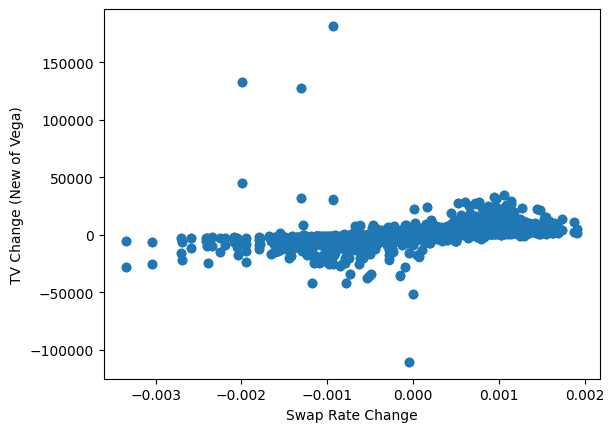

In [211]:
plt.scatter(data["Swap Rate Change"], data["TV Change (Net of Vega)"])
plt.xlabel("Swap Rate Change")
plt.ylabel("TV Change (New of Vega)")
# show the legend
plt.show()

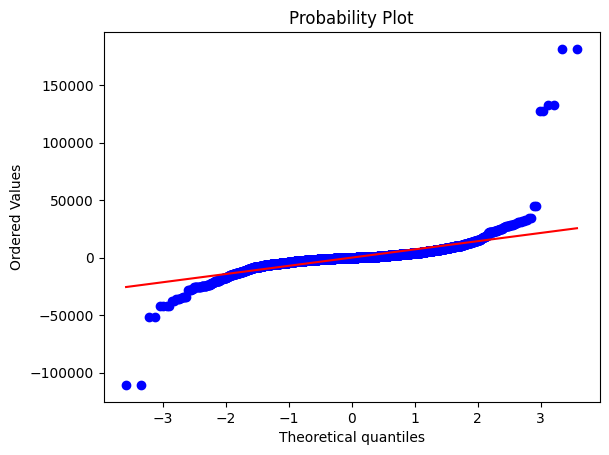

In [212]:
import scipy.stats as stats
import pylab
stats.probplot( (data["TV Change (Net of Vega)"]), dist="norm", plot=pylab)
pylab.show()

In [213]:
# Model Testing
from sklearn.linear_model import LinearRegression, SGDRegressor, BayesianRidge, HuberRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import PredictionErrorDisplay
from sklearn.ensemble import  RandomForestRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [214]:
def test_model(model, X_test, y_test):
    score = model.score(X_test, y_test)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1-(1-score)*(n-1)/(n-p-1)
    print("R^2:", score)
    print("Adjusted R^2:", score)
    y_pred = model.predict(X_test)
    display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
    display.plot()
    plt.show()
    plt.scatter(y_test, y_pred)
    plt.xlabel("actual")
    plt.ylabel("predicted")
    plt.show()
    return score



In [215]:
def gradientTrain(X_train, y_train, X_val, y_val):
    params = {"n_estimators": 200, 
          "metric": "rmse",
          "learning_rate": 0.07,           
          "num_leaves": 40,                
          "max_depth": 6,                          
          "early_stopping_round": 10,                         
          "random_state": 42,                         
          "reg_alpha": 0,                          
          "reg_lambda": 1.1,                         
          "min_split_gain": 0.15,                          
          "max_bin": 500,                         
          "top_rate": 0.2,                        
          "other_rate": 0.1,                         
          "training_metric": True,                       
          "verbose": -1, 
          "force_col_wise": True,
          }

    # initialize Gradient Boosting mode;
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_val, y_val)])
    return model


R^2: 0.5699855349429714
Adjusted R^2: 0.5699855349429714


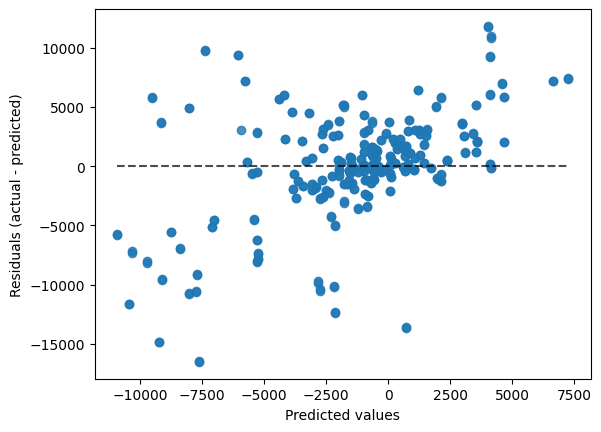

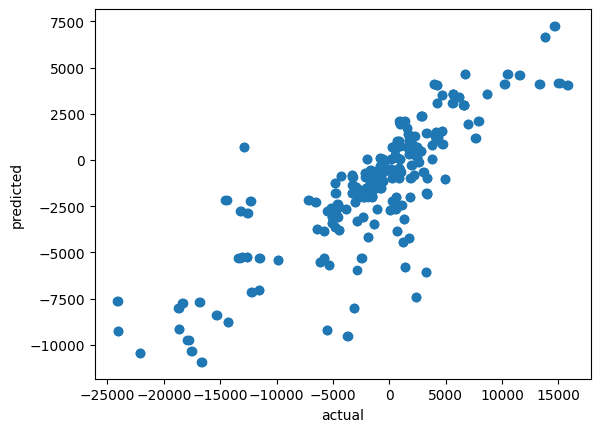

0.5699855349429714

In [216]:
LGBM = gradientTrain(X_train, y_train, X_val, y_val)
test_model(LGBM, X_test, y_test)

R^2: 0.710504288008132
Adjusted R^2: 0.710504288008132


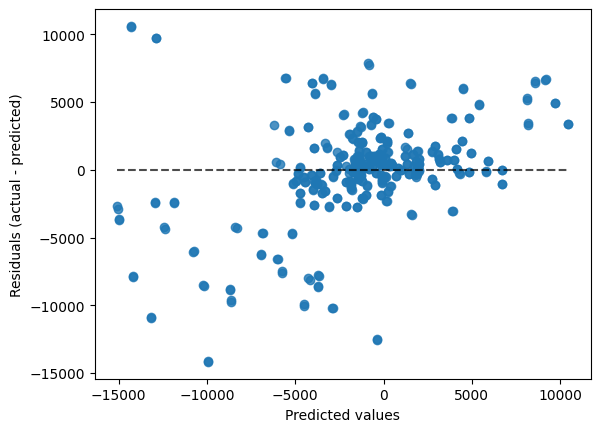

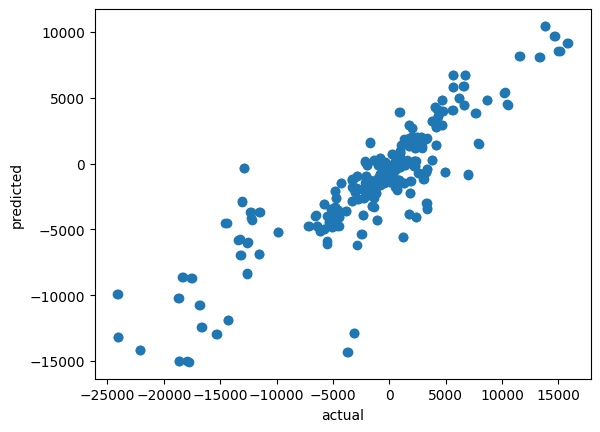

In [217]:
params = {"n_estimators": 150, 
          "criterion": "squared_error",           
          "random_state": 42,   
          }

ETmodel = ExtraTreesRegressor(**params)
ETmodel.fit(X_train, y_train)
score_ExtraTrees = test_model(ETmodel, X_test, y_test)

R^2: 0.648288414878359
Adjusted R^2: 0.648288414878359


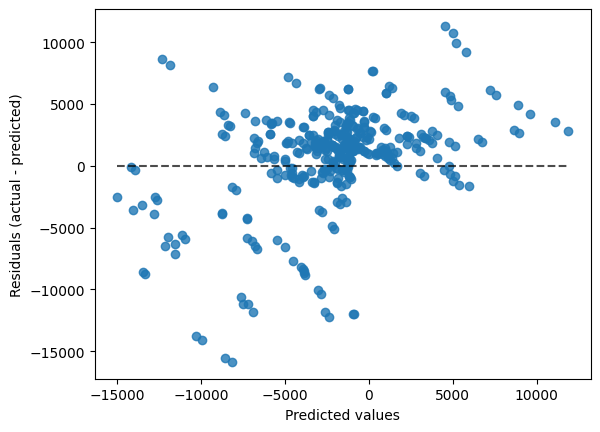

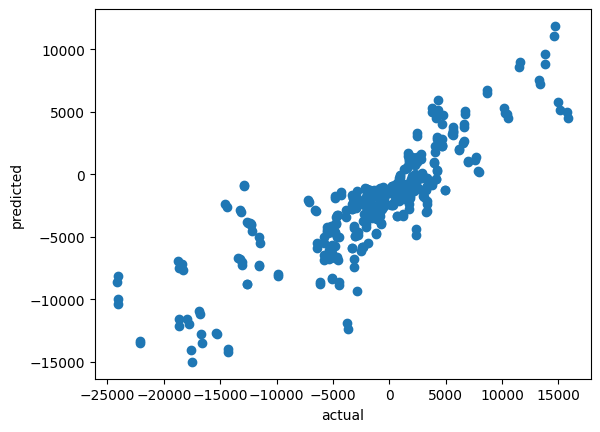

In [218]:
Poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(X_train, y_train)
score_poly = test_model(Poly, X_test, y_test)

R^2: 0.523658386679336
Adjusted R^2: 0.523658386679336


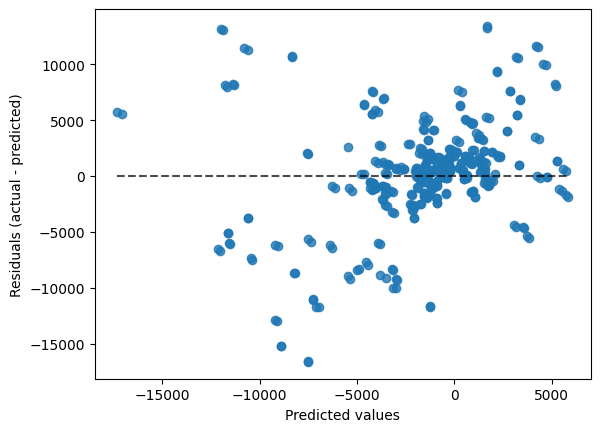

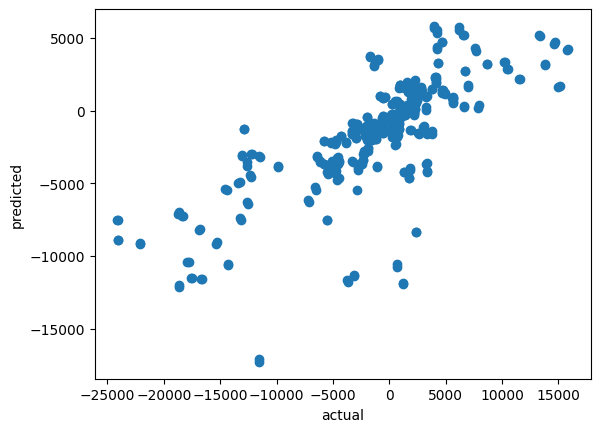

In [219]:
RF = RandomForestRegressor().fit(X_train, y_train)
score_RandomForest = test_model(RF, X_test, y_test)

R^2: 0.3743061832314819
Adjusted R^2: 0.3743061832314819


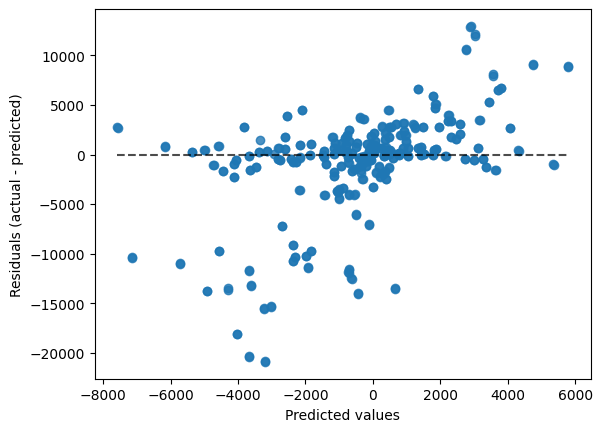

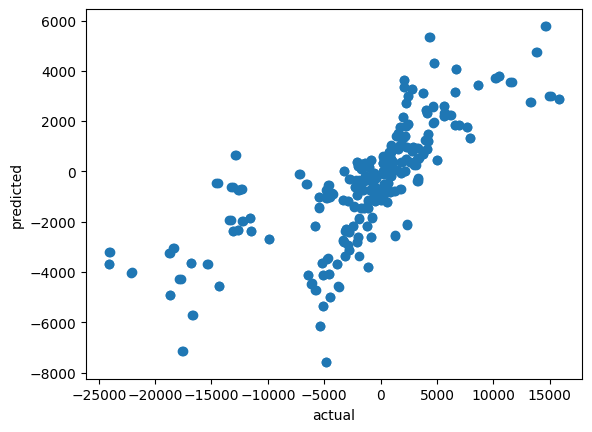

In [220]:
lr = LinearRegression().fit(X_train, y_train)
score_linear = test_model(lr, X_test, y_test)

R^2: -0.17334427500946514
Adjusted R^2: -0.17334427500946514


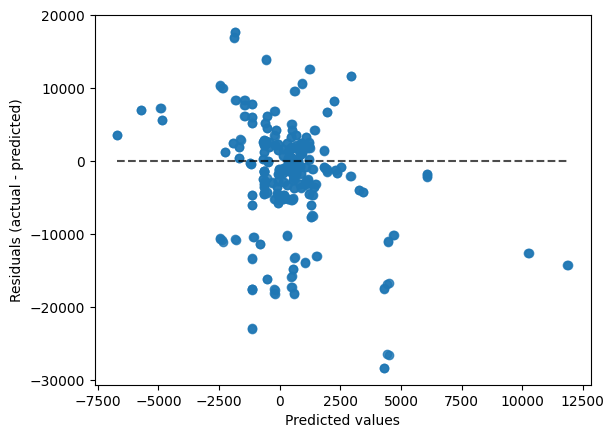

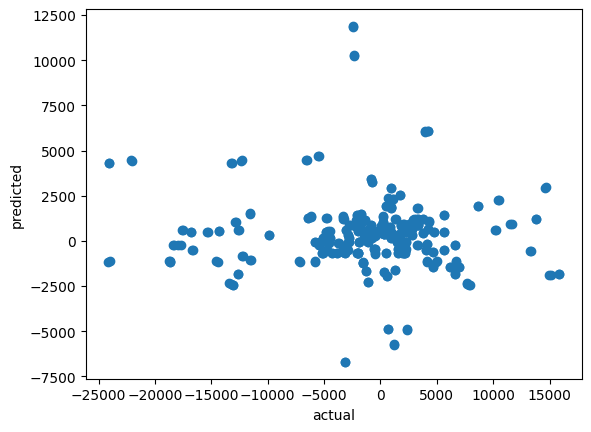

In [136]:
KNN = KNeighborsRegressor().fit(X_train, y_train)
score_KNN = test_model(KNN, X_test, y_test)

In [202]:
# Train Best model with shock data to strengthen the model
data = zero
y = data[target]
X = data[features]

In [203]:
# Split the data into train and test sets
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10
seed = 42
# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = seed, shuffle=False)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = seed, shuffle=False) 


R^2: 0.710504288008132
Adjusted R^2: 0.710504288008132


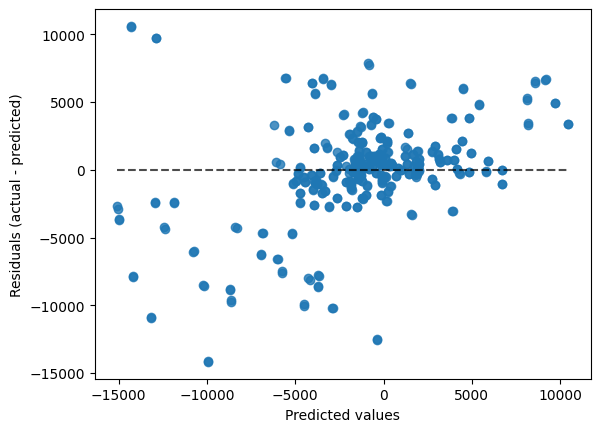

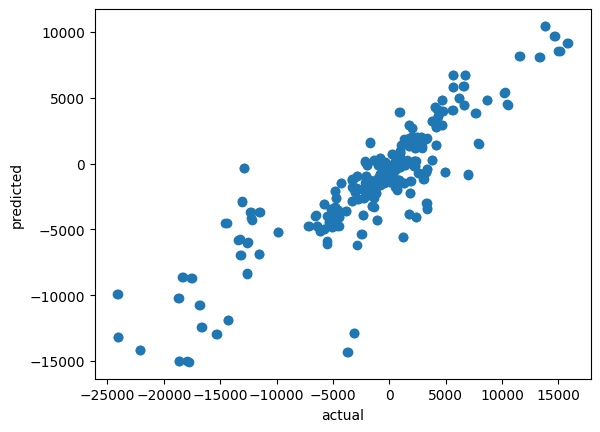

In [174]:
params = {"n_estimators": 150, 
          "criterion": "squared_error",           
          "random_state": 42,   
          }
# use warm start to retain the original model
ETmodel = ExtraTreesRegressor(**params, warm_start = True)
ETmodel.fit(X_train, y_train)
score_ExtraTrees = test_model(ETmodel, X_test, y_test)

R^2: 0.5109483330656244
Adjusted R^2: 0.5109483330656244


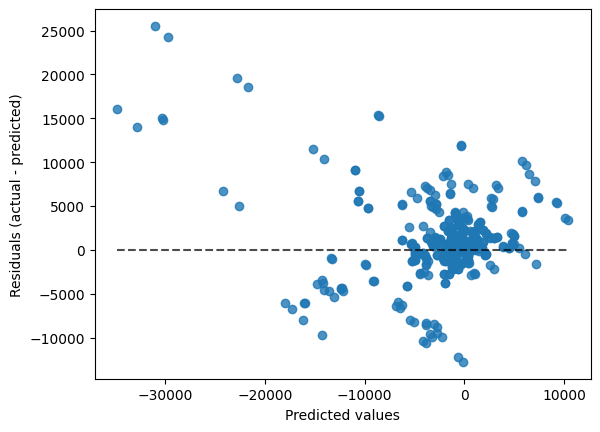

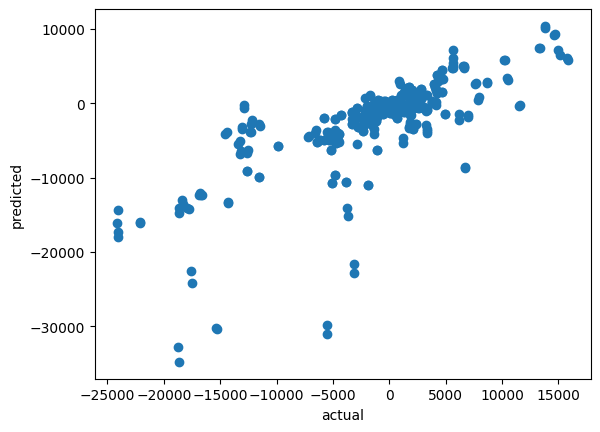

R^2: 0.23487093325090247
Adjusted R^2: 0.23487093325090247


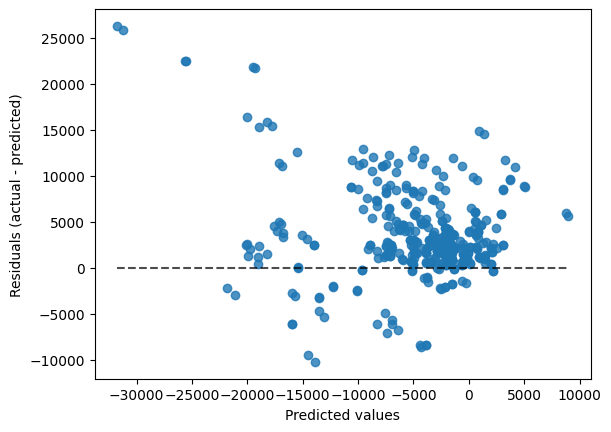

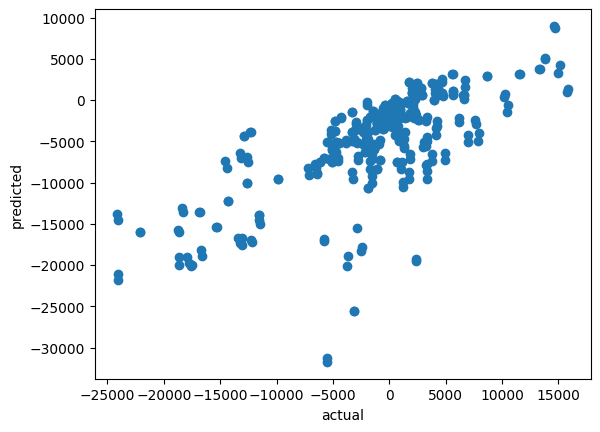

R^2: -2.045900277616438
Adjusted R^2: -2.045900277616438


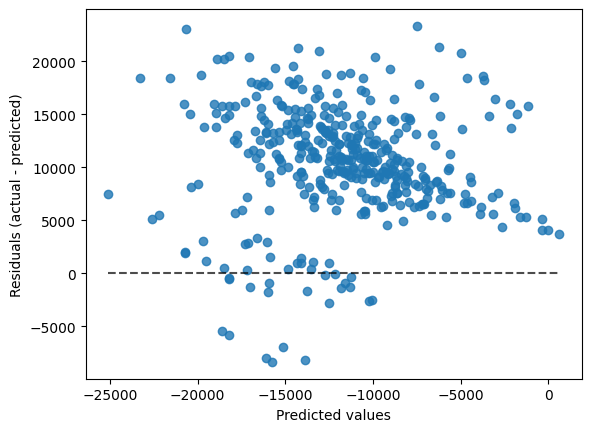

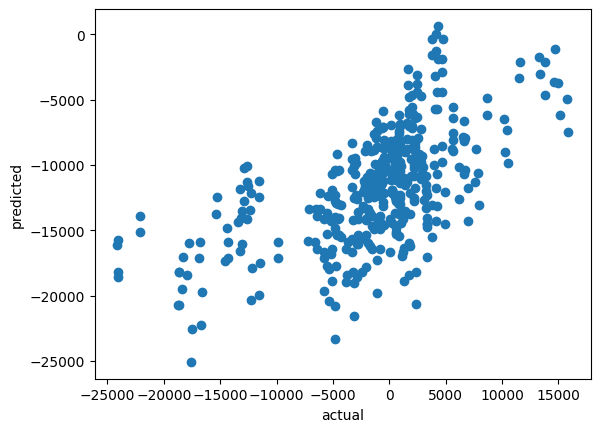

R^2: 0.648288414878359
Adjusted R^2: 0.648288414878359


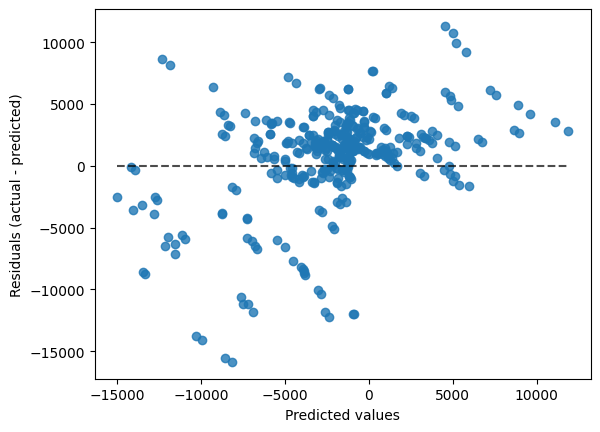

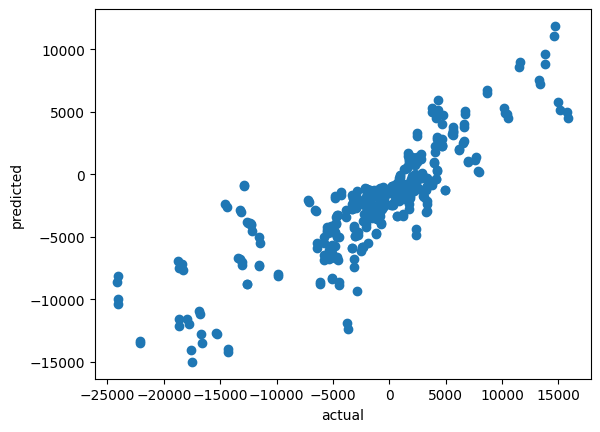

In [208]:
# Train Best model with shock data to strengthen the model
data = zero
y = data[target]
X = data[features]
# Split the data into train and test sets
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10
seed = 42
# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = seed, shuffle=False)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = seed, shuffle=False) 
score_ExtraTrees = test_model(ETmodel, X_test, y_test)
score_LGBM = test_model(LGBM, X_test, y_test)
score_linear = test_model(lr, X_test, y_test)
score_quad = test_model(Poly, X_test, y_test)

In [221]:
# Loading Swap Rate Model
from pickle import load
with open("../model/swapRateModel.pkl", "rb") as f:
    swapModel = load(f)

In [222]:
def swapModelPredict(model, data, confidence):
    import scipy.stats as stats
    # swapModel prediction is in % unit, need to perform scaling when predcing
    
    # features recreation
    features = ['Swap Rate Lag 1', 'Swap Rate Moving Average 2', 'Tenor',  'Swap Rate Std 5']
    X = data
    X = X.rename(columns = {'Swap Rate Lag 1 (Real)': 'Swap Rate Lag 1', 'CMS Tenor': 'Tenor'})
    delay = len(data.loc[data['Value Date'] == "2022-09-02"])
    X['Swap Rate Lag 1'] *= 100 # rescale for model prediction
    X['Swap Rate'] *= 100
    X['Swap Rate Moving Average 2'] = X.shift(delay).groupby(['Tenor'])['Swap Rate'].rolling(2).mean().reset_index(0,drop=True)
    X['Swap Rate Std 5'] = X.shift(delay).groupby(['Tenor'])['Swap Rate'].rolling(5).std().reset_index(0,drop=True)
    X_test = X[features]

    # Prediction
    y_test = data['Swap Rate'] 
    y_pred = model.predict(X_test)
    y_pred /= 100 # prediction rescaling to same unit
    
    def confidenceIntervalN(confidence):
        # finding coef and alpha for required confidence
        # confidence = 1 - 2a
        a = (1 - confidence)/2
        coef = stats.norm.ppf(1-a)
        return a, coef
    
    # Constant Variance Prediction Interval
    def swapPredictionInterval():
        # Prediction Interval Using Const variance assumption and Normal Dist assumption of residuals
        a, coef = confidenceIntervalN(confidence)
        y_test = data['Swap Rate'] 
        # residual variance estimator-> MSE
        # Find MSE and convert to standard deviation
        error = sklearn.metrics.mean_squared_error(y_pred, y_test) ** 0.5 
        # CI = [u +- z*sigma]
        upper, lower = y_pred + coef * error, y_pred - coef * error
        return upper, lower
        
    # Validate ideas with with Breach Ratio of Confidence Interval -> BR of less than < 0.01 is good 
    def breachRatio( Upper, Lower, X_test, y_test, confidence):
        # Compare actual_confidence and expected confidence
        # Breach Ratio = Abs(actual - expected)
        # Lower: bound; Upper: bound
        lower_bound = Lower
        upper_bound = Upper
    
        inbound = (y_test >= lower_bound) & (y_test <= upper_bound)
        total_obs = y_test.count()
        total_inbound = inbound.sum() # all true value will be summed
        actual_confidence = total_inbound/total_obs 
        breach_ratio, sign = abs(actual_confidence - confidence), (actual_confidence - confidence) > 0
        return breach_ratio, sign
        
    def printBreachRatio(breach_ratio, sign):
        threshold = 0.01
        if breach_ratio < threshold:
            intervalCondition = "Good"
        else:
            intervalCondition = "overbound" if sign else "underbound"
        print("The breach_ratio of Model is:", breach_ratio, "\nThe prediction interval is", intervalCondition)
    def printWidth(upper, lower):
        width = np.mean(upper-lower)
        print("Average Width of Prediction Interval of Swap Rate is", width, f"(={width*100}%)")
    upper, lower = swapPredictionInterval()
    printWidth(upper, lower)
    breach_ratio, sign = breachRatio(upper, lower, X_test, y_test, confidence)
    printBreachRatio(breach_ratio, sign)
    return y_pred, upper, lower # a pandas DF matching the original DataFrame

In [223]:
alpha = 0.9
y_pred, upper, lower = swapModelPredict(swapModel, data = zero, confidence= alpha)
upper_name = f'Swap Upper ({alpha*100}% Pred)'
lower_name = f'Swap Lower ({alpha*100}% Pred)'
zero['Swap Rate (Pred)'] = y_pred
zero[upper_name] = upper
zero[lower_name] = lower
zero

Average Width of Prediction Interval of Swap Rate is 0.0024831626900698595 (=0.24831626900698595%)
The breach_ratio of Model is: 0.0024875621890546595 
The prediction interval is Good


,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol,Swap Rate Lag 1 (Real),Vols Lag 1,Vols Change,Vega Lag 1,Vega Risk Exposure,Swap Rate Change,TV Lag 1,TV Change,Vega Risk Exposure (Total),TV Change (Net of Vega),Swap Rate (Pred),Swap Upper (90.0% Pred),Swap Lower (90.0% Pred)
0,2022-09-06,dummyTrade1,USD,0,0.00000,-213822.82723,1.00000,2023-09-06,10.00000,2.04819,2,0.03026,0.03026,0.00420,0.03790,0.03370,6,5,0.02606,0.00764,False,0.00764,0.16844,0.41769,0.02916,0.17753,-0.00908,5.01627,-0.04555,0.00111,-215402.65615,1579.82892,-0.04555,1579.87448,0.02649,0.02773,0.02525
1,2022-09-06,dummyTrade10,USD,0,0.00000,-608794.62408,1.00000,2023-09-06,10.00000,-102.12255,5,0.02852,0.02852,0.00440,0.03970,0.03530,4,10,0.02412,0.01118,False,0.01118,0.16844,0.41769,0.02725,0.17753,-0.00908,-59.82041,0.54325,0.00128,-616299.36924,7504.74516,0.54325,7504.20191,0.02425,0.02549,0.02301
2,2022-09-06,dummyTrade11,USD,0,0.00000,-602313.87632,1.00000,2023-09-06,10.00000,20.55242,10,0.02853,0.02853,0.00460,0.04170,0.03710,4,10,0.02393,0.01317,False,0.01317,0.16844,0.41769,0.02738,0.17753,-0.00908,7.76260,-0.07049,0.00115,-608678.01098,6364.13466,-0.07049,6364.20515,0.02463,0.02587,0.02339
3,2022-09-06,dummyTrade12,USD,0,0.00000,-603011.20245,1.00000,2023-09-06,10.00000,13.52246,10,0.02853,0.02853,0.00460,0.04170,0.03710,3,10,0.02393,0.01317,False,0.01317,0.16844,0.41769,0.02738,0.17753,-0.00908,25.32978,-0.23003,0.00115,-609360.66241,6349.45996,-0.23003,6349.68999,0.02751,0.02875,0.02627
4,2022-09-06,dummyTrade2,USD,0,0.00000,-214277.74913,1.00000,2023-09-06,10.00000,0.16347,2,0.03026,0.03026,0.00420,0.03790,0.03370,4,5,0.02606,0.00764,False,0.00764,0.16844,0.41769,0.02916,0.17753,-0.00908,5.40938,-0.04912,0.00111,-215836.78721,1559.03807,-0.04912,1559.08720,0.02918,0.03042,0.02794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,2024-01-12,dummyTrade5,USD,0,0.00000,-200752.70782,1.00000,2025-01-13,10.00000,0.78280,10,0.03171,0.03171,0.00460,0.04170,0.03710,4,5,0.02711,0.00999,False,0.00999,0.92804,1.00758,0.03188,0.92354,0.00450,0.75365,0.00339,-0.00016,-201031.68108,278.97326,0.00339,278.96986,0.03186,0.03311,0.03062
4016,2024-01-12,dummyTrade6,USD,0,0.00000,-200966.21477,1.00000,2025-01-13,10.00000,-4.09032,10,0.03171,0.03171,0.00460,0.04170,0.03710,3,5,0.02711,0.00999,False,0.00999,0.92804,1.00758,0.03188,0.92354,0.00450,-4.36658,-0.01967,-0.00016,-201241.28870,275.07393,-0.01967,275.09360,0.03186,0.03311,0.03062
4017,2024-01-12,dummyTrade7,USD,0,0.00000,-507396.66328,1.00000,2025-01-13,10.00000,-24.00955,2,0.02983,0.02983,0.00420,0.03790,0.03370,6,10,0.02563,0.00807,False,0.00807,0.92804,1.00758,0.03052,0.92354,0.00450,41.87847,0.18864,-0.00069,-509747.56833,2350.90505,0.18864,2350.71641,0.03048,0.03172,0.02924
4018,2024-01-12,dummyTrade8,USD,0,0.00000,-508418.03933,1.00000,2025-01-13,10.00000,41.98539,2,0.02983,0.02983,0.00420,0.03790,0.03370,4,10,0.02563,0.00807,False,0.00807,0.92804,1.00758,0.03052,0.92354,0.00450,8.07293,0.03637,-0.00069,-510774.02962,2355.99029,0.03637,2355.95392,0.03048,0.03172,0.02924


In [224]:
# Predicted Upper Change = Upper prediction - last swap rate
zero['Swap Rate Change (Upper Pred)'] = zero[upper_name] - zero['Swap Rate Lag 1 (Real)']
zero['Swap Rate Change (Lower Pred)'] = zero[lower_name] - zero['Swap Rate Lag 1 (Real)']
zero

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol,Swap Rate Lag 1 (Real),Vols Lag 1,Vols Change,Vega Lag 1,Vega Risk Exposure,Swap Rate Change,TV Lag 1,TV Change,Vega Risk Exposure (Total),TV Change (Net of Vega),Swap Rate (Pred),Swap Upper (90.0% Pred),Swap Lower (90.0% Pred),Swap Rate Change (Upper Pred),Swap Rate Change (Lower Pred)
0,2022-09-06,dummyTrade1,USD,0,0.00000,-213822.82723,1.00000,2023-09-06,10.00000,2.04819,2,0.03026,0.03026,0.00420,0.03790,0.03370,6,5,0.02606,0.00764,False,0.00764,0.16844,0.41769,0.02916,0.17753,-0.00908,5.01627,-0.04555,0.00111,-215402.65615,1579.82892,-0.04555,1579.87448,0.02649,0.02773,0.02525,-0.00142,-0.00391
1,2022-09-06,dummyTrade10,USD,0,0.00000,-608794.62408,1.00000,2023-09-06,10.00000,-102.12255,5,0.02852,0.02852,0.00440,0.03970,0.03530,4,10,0.02412,0.01118,False,0.01118,0.16844,0.41769,0.02725,0.17753,-0.00908,-59.82041,0.54325,0.00128,-616299.36924,7504.74516,0.54325,7504.20191,0.02425,0.02549,0.02301,-0.00175,-0.00424
2,2022-09-06,dummyTrade11,USD,0,0.00000,-602313.87632,1.00000,2023-09-06,10.00000,20.55242,10,0.02853,0.02853,0.00460,0.04170,0.03710,4,10,0.02393,0.01317,False,0.01317,0.16844,0.41769,0.02738,0.17753,-0.00908,7.76260,-0.07049,0.00115,-608678.01098,6364.13466,-0.07049,6364.20515,0.02463,0.02587,0.02339,-0.00151,-0.00399
3,2022-09-06,dummyTrade12,USD,0,0.00000,-603011.20245,1.00000,2023-09-06,10.00000,13.52246,10,0.02853,0.02853,0.00460,0.04170,0.03710,3,10,0.02393,0.01317,False,0.01317,0.16844,0.41769,0.02738,0.17753,-0.00908,25.32978,-0.23003,0.00115,-609360.66241,6349.45996,-0.23003,6349.68999,0.02751,0.02875,0.02627,0.00137,-0.00111
4,2022-09-06,dummyTrade2,USD,0,0.00000,-214277.74913,1.00000,2023-09-06,10.00000,0.16347,2,0.03026,0.03026,0.00420,0.03790,0.03370,4,5,0.02606,0.00764,False,0.00764,0.16844,0.41769,0.02916,0.17753,-0.00908,5.40938,-0.04912,0.00111,-215836.78721,1559.03807,-0.04912,1559.08720,0.02918,0.03042,0.02794,0.00126,-0.00122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,2024-01-12,dummyTrade5,USD,0,0.00000,-200752.70782,1.00000,2025-01-13,10.00000,0.78280,10,0.03171,0.03171,0.00460,0.04170,0.03710,4,5,0.02711,0.00999,False,0.00999,0.92804,1.00758,0.03188,0.92354,0.00450,0.75365,0.00339,-0.00016,-201031.68108,278.97326,0.00339,278.96986,0.03186,0.03311,0.03062,0.00123,-0.00125
4016,2024-01-12,dummyTrade6,USD,0,0.00000,-200966.21477,1.00000,2025-01-13,10.00000,-4.09032,10,0.03171,0.03171,0.00460,0.04170,0.03710,3,5,0.02711,0.00999,False,0.00999,0.92804,1.00758,0.03188,0.92354,0.00450,-4.36658,-0.01967,-0.00016,-201241.28870,275.07393,-0.01967,275.09360,0.03186,0.03311,0.03062,0.00123,-0.00125
4017,2024-01-12,dummyTrade7,USD,0,0.00000,-507396.66328,1.00000,2025-01-13,10.00000,-24.00955,2,0.02983,0.02983,0.00420,0.03790,0.03370,6,10,0.02563,0.00807,False,0.00807,0.92804,1.00758,0.03052,0.92354,0.00450,41.87847,0.18864,-0.00069,-509747.56833,2350.90505,0.18864,2350.71641,0.03048,0.03172,0.02924,0.00120,-0.00128
4018,2024-01-12,dummyTrade8,USD,0,0.00000,-508418.03933,1.00000,2025-01-13,10.00000,41.98539,2,0.02983,0.02983,0.00420,0.03790,0.03370,4,10,0.02563,0.00807,False,0.00807,0.92804,1.00758,0.03052,0.92354,0.00450,8.07293,0.03637,-0.00069,-510774.02962,2355.99029,0.03637,2355.95392,0.03048,0.03172,0.02924,0.00120,-0.00128


R^2 = 0.9530377685511444


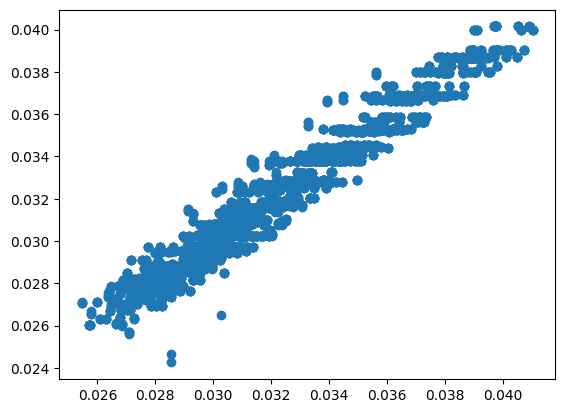

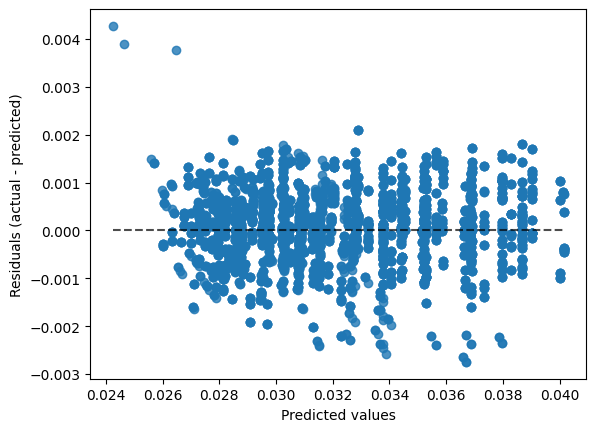

In [225]:
y_test = zero['Swap Rate']
plt.scatter(y_test, y_pred)
# Calculate R^2 and R^2 adj to evaluate model adequacy
R_sq = sklearn.metrics.r2_score(y_test, y_pred)
#n = X_test.shape[0]
#p = X_test.shape[1]
#adjusted_r2 = 1-(1-R_sq)*(n-1)/(n-p-1)
print("R^2 =", R_sq) 
#print("Adjusted R^2 =", adjusted_r2)
from sklearn.metrics import PredictionErrorDisplay
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()

In [226]:
# The residual plot supported the constant variance residual assumption

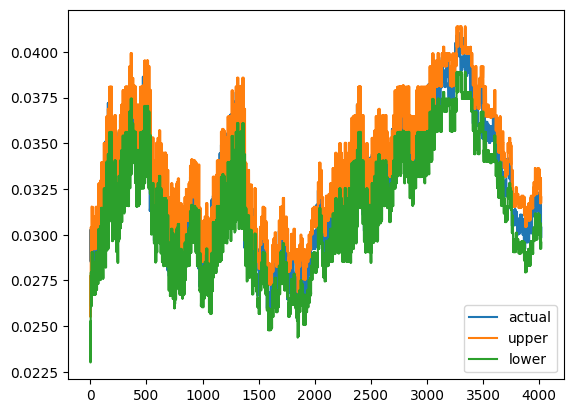

In [227]:
# Notes: First 5 days will have high residual since Std 5 features is not filled

plt.plot(y_test, label = "actual")
#plt.plot(y_pred, label = "prediction")
plt.plot(upper, label = "upper")
plt.plot(lower, label = "lower")
# show the legend
plt.legend()
plt.show()

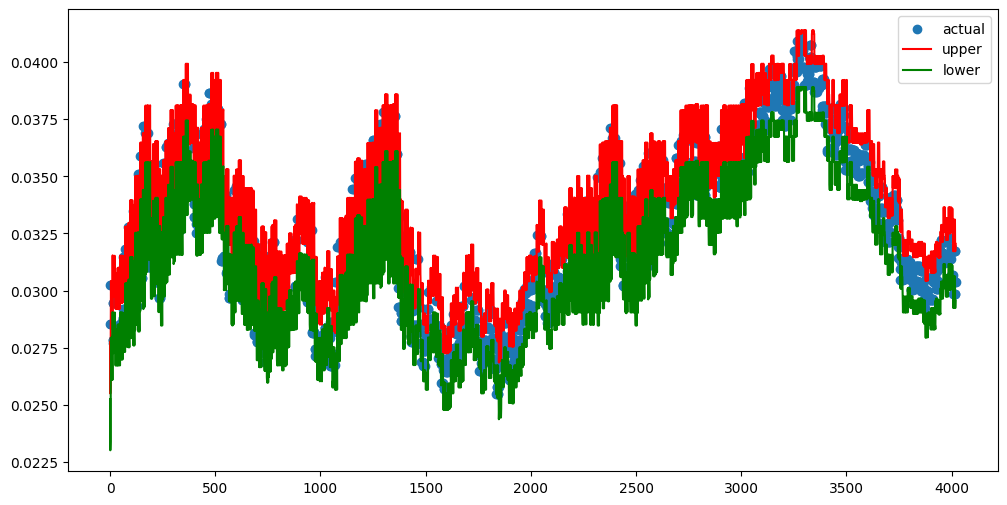

In [228]:
# Notes: First 5 days will have high residual since Std 5 features is not filled
plt.figure(figsize=(12,6))
plt.scatter(y_test.index, y_test, label = "actual")
#plt.plot(y_pred, label = "prediction")
plt.plot(upper, label = "upper", color = "Red")
plt.plot(lower, label = "lower", color = "Green")
# show the legend
plt.legend()
plt.show()

In [229]:
# IR model -> given a swap rate change prediction -> output corresponding TV change

# Next Step: Find Swap rate Change (upper + lower) * IR model prediction to find predicted TV change (90% Condifence Interval)
# Then validate with 90% Condeidence The value at risk and actual risk (how many the actual TV chagne is in bound of the Value at risk,
# Can calculate tail risk wtih by averaging the outliers value

In [230]:
def IRmodelPredict(data, model):
    X_test = data[features].drop(columns = {'Swap Rate Change'})
    #X_test.columns = X_test.columns.str.replace(' ', '_')
    # drop swap rate change columns in features
    # Replace with upper and lower bound prediction
    #Upper
    X_upper = X_test
    X_test['Swap Rate Change'] = data['Swap Rate Change (Upper Pred)']
    X_upper = X_test[features]
    Y_upperPred = model.predict(X_upper)
    # Lower
    X_lower = X_test
    X_test['Swap Rate Change'] =  data['Swap Rate Change (Lower Pred)']
    X_lower = X_test[features]
    Y_lowerPred = model.predict(X_lower)
    return Y_upperPred, Y_lowerPred

In [231]:
curr = zero
Y_upperPred, Y_lowerPred = IRmodelPredict(curr, ETmodel)
curr['TV Change (Upper Pred)'] = Y_upperPred
curr['TV Change (Lower Pred)'] = Y_lowerPred
curr


,Value Date,Trade Name,Trade Currency,Zero Rate Shock,Zero Rate Shock (DEC),TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,CMS Tenor,Swap Rate,Swap Rate (Shocked),lower_bound,upper_bound,bound width,month_pay_frequency,year_maturity,Distance_lower (Shocked),Distance_upper (Shocked),Out of Bound,Swap_Bound Distance,Vols,evol,Swap Rate Lag 1 (Real),Vols Lag 1,Vols Change,Vega Lag 1,Vega Risk Exposure,Swap Rate Change,TV Lag 1,TV Change,Vega Risk Exposure (Total),TV Change (Net of Vega),Swap Rate (Pred),Swap Upper (90.0% Pred),Swap Lower (90.0% Pred),Swap Rate Change (Upper Pred),Swap Rate Change (Lower Pred),TV Change (Upper Pred),TV Change (Lower Pred)
0,2022-09-06,dummyTrade1,USD,0,0.00000,-213822.82723,1.00000,2023-09-06,10.00000,2.04819,2,0.03026,0.03026,0.00420,0.03790,0.03370,6,5,0.02606,0.00764,False,0.00764,0.16844,0.41769,0.02916,0.17753,-0.00908,5.01627,-0.04555,0.00111,-215402.65615,1579.82892,-0.04555,1579.87448,0.02649,0.02773,0.02525,-0.00142,-0.00391,-1560.12009,-4849.60992
1,2022-09-06,dummyTrade10,USD,0,0.00000,-608794.62408,1.00000,2023-09-06,10.00000,-102.12255,5,0.02852,0.02852,0.00440,0.03970,0.03530,4,10,0.02412,0.01118,False,0.01118,0.16844,0.41769,0.02725,0.17753,-0.00908,-59.82041,0.54325,0.00128,-616299.36924,7504.74516,0.54325,7504.20191,0.02425,0.02549,0.02301,-0.00175,-0.00424,-8430.17414,-21762.97481
2,2022-09-06,dummyTrade11,USD,0,0.00000,-602313.87632,1.00000,2023-09-06,10.00000,20.55242,10,0.02853,0.02853,0.00460,0.04170,0.03710,4,10,0.02393,0.01317,False,0.01317,0.16844,0.41769,0.02738,0.17753,-0.00908,7.76260,-0.07049,0.00115,-608678.01098,6364.13466,-0.07049,6364.20515,0.02463,0.02587,0.02339,-0.00151,-0.00399,-8355.88750,-21126.78523
3,2022-09-06,dummyTrade12,USD,0,0.00000,-603011.20245,1.00000,2023-09-06,10.00000,13.52246,10,0.02853,0.02853,0.00460,0.04170,0.03710,3,10,0.02393,0.01317,False,0.01317,0.16844,0.41769,0.02738,0.17753,-0.00908,25.32978,-0.23003,0.00115,-609360.66241,6349.45996,-0.23003,6349.68999,0.02751,0.02875,0.02627,0.00137,-0.00111,7166.48392,-6762.38091
4,2022-09-06,dummyTrade2,USD,0,0.00000,-214277.74913,1.00000,2023-09-06,10.00000,0.16347,2,0.03026,0.03026,0.00420,0.03790,0.03370,4,5,0.02606,0.00764,False,0.00764,0.16844,0.41769,0.02916,0.17753,-0.00908,5.40938,-0.04912,0.00111,-215836.78721,1559.03807,-0.04912,1559.08720,0.02918,0.03042,0.02794,0.00126,-0.00122,1362.92649,-1648.03352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,2024-01-12,dummyTrade5,USD,0,0.00000,-200752.70782,1.00000,2025-01-13,10.00000,0.78280,10,0.03171,0.03171,0.00460,0.04170,0.03710,4,5,0.02711,0.00999,False,0.00999,0.92804,1.00758,0.03188,0.92354,0.00450,0.75365,0.00339,-0.00016,-201031.68108,278.97326,0.00339,278.96986,0.03186,0.03311,0.03062,0.00123,-0.00125,3755.83556,-5184.05298
4016,2024-01-12,dummyTrade6,USD,0,0.00000,-200966.21477,1.00000,2025-01-13,10.00000,-4.09032,10,0.03171,0.03171,0.00460,0.04170,0.03710,3,5,0.02711,0.00999,False,0.00999,0.92804,1.00758,0.03188,0.92354,0.00450,-4.36658,-0.01967,-0.00016,-201241.28870,275.07393,-0.01967,275.09360,0.03186,0.03311,0.03062,0.00123,-0.00125,3758.10915,-5185.56361
4017,2024-01-12,dummyTrade7,USD,0,0.00000,-507396.66328,1.00000,2025-01-13,10.00000,-24.00955,2,0.02983,0.02983,0.00420,0.03790,0.03370,6,10,0.02563,0.00807,False,0.00807,0.92804,1.00758,0.03052,0.92354,0.00450,41.87847,0.18864,-0.00069,-509747.56833,2350.90505,0.18864,2350.71641,0.03048,0.03172,0.02924,0.00120,-0.00128,8769.67903,-15463.37339
4018,2024-01-12,dummyTrade8,USD,0,0.00000,-508418.03933,1.00000,2025-01-13,10.00000,41.98539,2,0.02983,0.02983,0.00420,0.03790,0.03370,4,10,0.02563,0.00807,False,0.00807,0.92804,1.00758,0.03052,0.92354,0.00450,8.07293,0.03637,-0.00069,-510774.02962,2355.99029,0.03637,2355.95392,0.03048,0.03172,0.02924,0.00120,-0.00128,8776.90947,-15432.80953


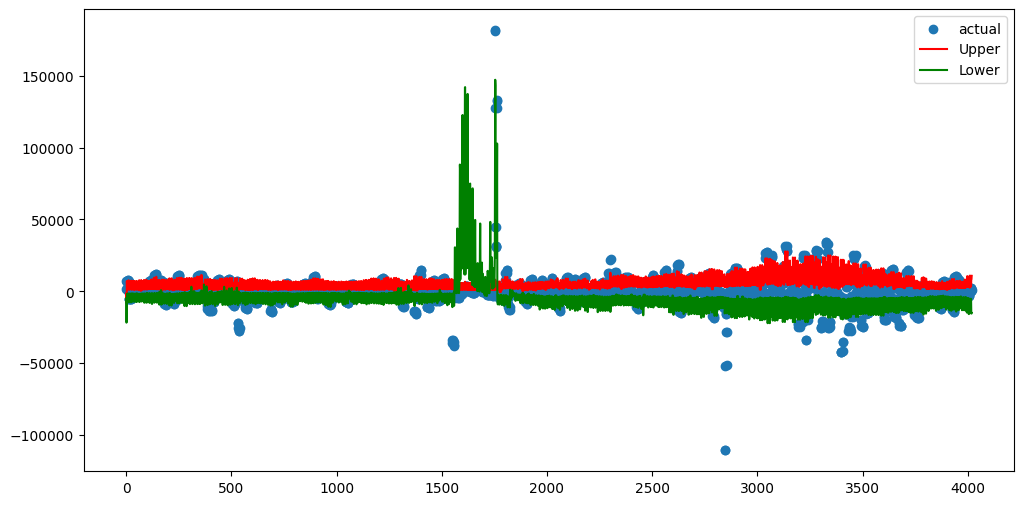

In [232]:
# Notes: First 5 days will have high residual since Std 5 features is not filled
plt.figure(figsize=(12,6))
plt.scatter(y.index, y, label = "actual")
#plt.plot(y_pred, label = "prediction")
#plt.plot(upper, label = "upper", color = "Red")
#plt.plot(lower, label = "lower", color = "Green")
# show the legend


#plt.plot(y, label = "Actual")
plt.plot(Y_upperPred, label = "Upper", color = "Red")
plt.plot(Y_lowerPred, label = "Lower", color = "Green")
plt.legend()
plt.show()